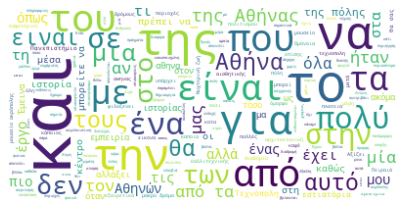

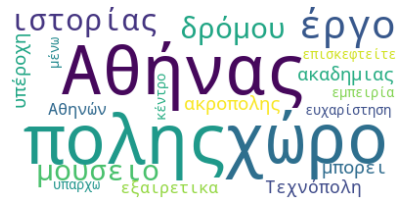

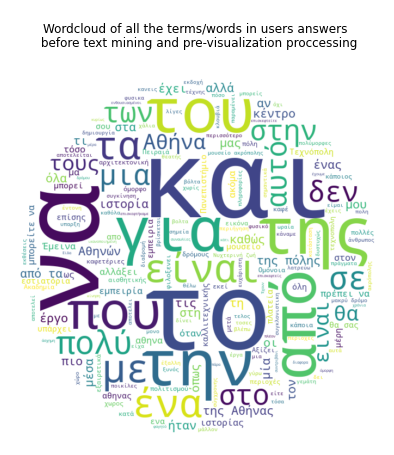

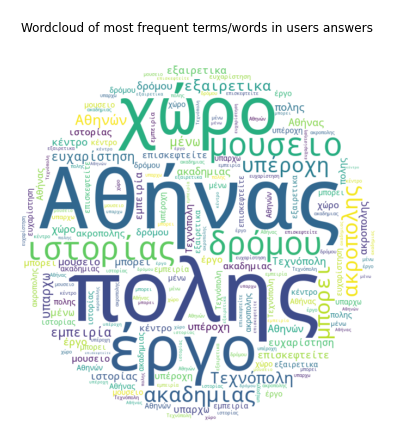

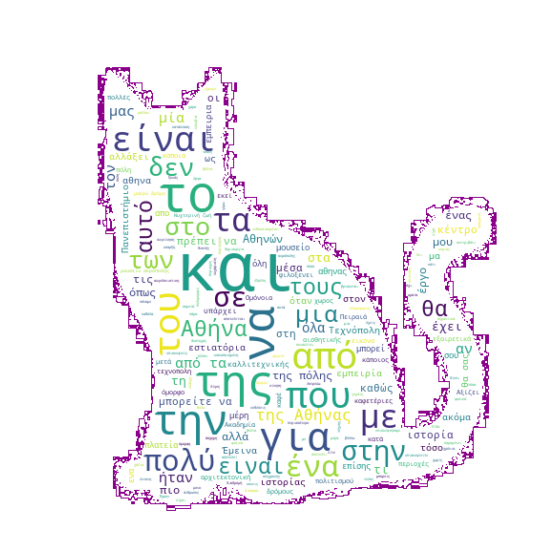

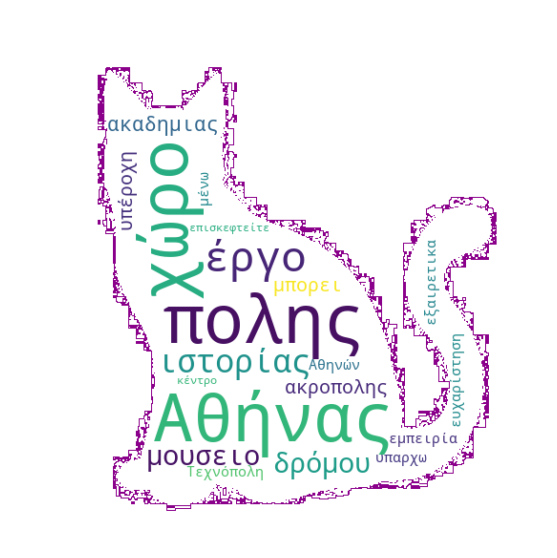

In [1]:
# using encoding='utf8'
# reference : https://realpython.com/natural-language-processing-spacy-python/
# reference : https://plotly.com/python/basic-charts/

import json
import requests
import spacy
import re
import string
import read_input_data as rid
import tiger_tokenizer
import tiger_lemmatizer
import tiger_manage_tokens as tmt
import tiger_visualizations as visual
import tiger_tagger as tag
import tiger_sentiment_analysis as sa
import tiger_visualization_wordclouds as tvw
import tiger_frequencies as tf
from collections import Counter
from spacy.tokens import Doc

# step 1: load data from file
# text_before contains each term/word that was found in user's answers
data_file = open("dummyData.txt","r")
data_to_tokenize = rid.all_answers(data_file)
data_file.close()

# step 2.1: Tokenization 
doc_tokenization = tiger_tokenizer.tokenization_process(data_to_tokenize)

# step 2.2: Lemmatization
doc_lemmatization = tiger_lemmatizer.lemmatization_process(doc_tokenization)

# step 3: Find frequency of words
# and sort words according to their frequency
word_freq,sorted_words = tf.sort_according_to__frequency(doc_lemmatization)

# step 4: visualize text mining data, using various techniques
visual.visualization_frequency_1(word_freq,sorted_words)
visual.visualization_frequency_2(word_freq,sorted_words)

# step 5: wordcloud visualization

# step 5.0: get raw data again, to visualize them too, 
# in order to show the differencies among pre and after 
# text mining and text data processing
data_file = open("dummyData.txt","r")
data_to_tokenize = rid.all_answers(data_file)
data_file.close()

# step 5.1: getting a text that is a composition of 
# maximum number of most frequent words
max_words_text = tf.text_depending_on_frequency(word_freq,sorted_words,20)
title_raw_data = "\nWordcloud of all the terms/words in users answers \n before text mining and pre-visualization proccessing\n"
title_proccessed_data = "\nWordcloud of most frequent terms/words in users answers\n"

# step 5.2.1:  simple wordcloud
# visualize data before any text mining and processing
tvw.visualization_wordcloud_simple(data_to_tokenize,title_raw_data)
# visualize most frequent words in users answers 
tvw.visualization_wordcloud_simple(max_words_text,title_proccessed_data)

# step 5.2.2: single word
# visualize data before any text mining and processing
tvw.visualization_wordcloud_singleWord(data_to_tokenize,title_raw_data)
# visualize most frequent words in users answers 
tvw.visualization_wordcloud_singleWord(max_words_text,title_proccessed_data)

# step 5.2.3: wordcloud with mask
# visualize data before any text mining and processing
tvw.visualization_wordcloud_mask(data_to_tokenize,title_raw_data)
# visualize most frequent words in users answers 
tvw.visualization_wordcloud_mask(max_words_text,title_proccessed_data)



